In [ ]:
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip


import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

--2024-08-30 06:29:16--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   203MB/s    in 0.7s    

2024-08-30 06:29:17 (203 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
#directory with the training horse img
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

#directory with the training human img
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

['horse33-6.png', 'horse08-0.png', 'horse25-9.png', 'horse48-6.png', 'horse10-3.png', 'horse38-3.png', 'horse10-1.png', 'horse06-9.png', 'horse07-7.png', 'horse18-8.png']
['human07-00.png', 'human08-05.png', 'human15-07.png', 'human07-24.png', 'human04-23.png', 'human14-21.png', 'human10-17.png', 'human15-12.png', 'human16-05.png', 'human06-23.png']
total training horse images: 500
total training human images: 527


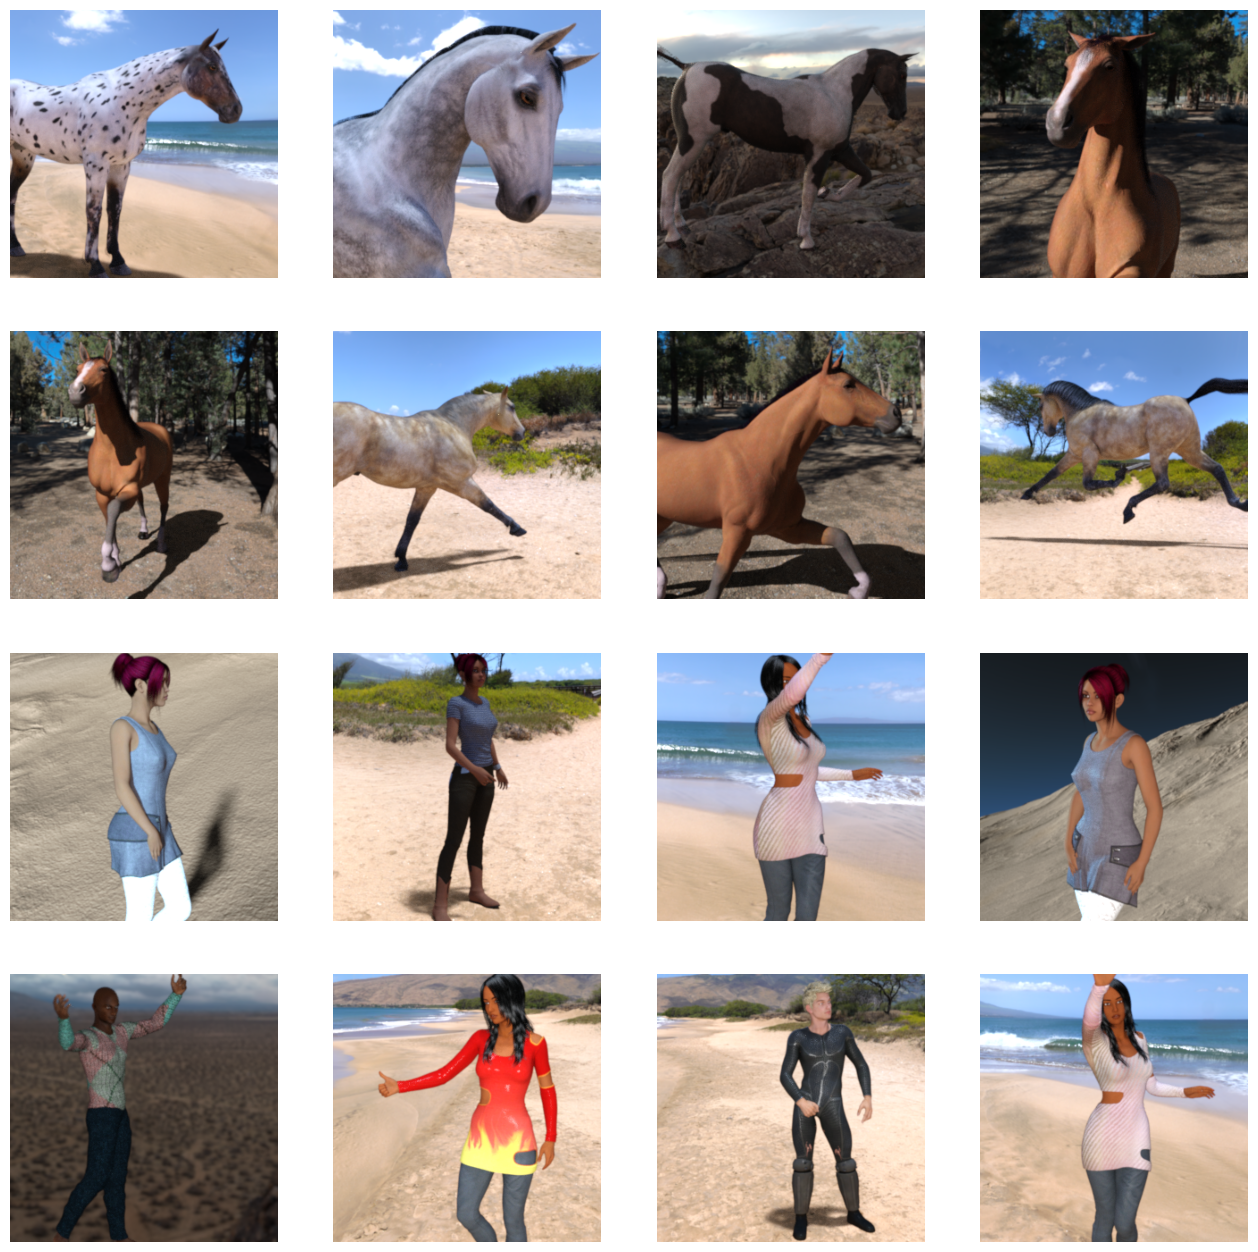

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for our graph .. 4X4
nrows = 4
ncols = 4

#index for iterating over images
pic_index = 0

#set up matplotlib fig, and size it to fit 4X4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    #set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') #dont show axes (or gridlines)
    img=mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
layer_0=tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3))
layer_1=tf.keras.layers.MaxPool2D(2,2)
layer_2=tf.keras.layers.Conv2D(32, (3,3), activation='relu')
layer_3=tf.keras.layers.MaxPool2D(2,2)
layer_4=tf.keras.layers.Conv2D(64, (3,3), activation='relu')
layer_5=tf.keras.layers.MaxPool2D(2,2)
layer_6=tf.keras.layers.Conv2D(64, (3,3), activation='relu')
layer_7=tf.keras.layers.MaxPool2D(2,2)
layer_8=tf.keras.layers.Conv2D(64, (3,3), activation='relu')
layer_9=tf.keras.layers.MaxPool2D(2,2)
layer_f = tf.keras.layers.Flatten()
layer_h = tf.keras.layers.Dense(512, activation='relu')
#Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
layer_o = tf.keras.layers.Dense(1, activation='sigmoid')

model=tf.keras.models.Sequential([layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,440 (380.62 KB)

 Trainable params: 97,440 (380.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

histoy= model.fit(train_generator,
                  steps_per_epoch=8,
                  epochs=15,
                  verbose=1)

Found 1027 images belonging to 2 classes.


ValueError: You must call `compile()` before using the model.